#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [ ]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import HTML

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [ ]:
#add your code
site_url='https://mobelix.com.mk/mk/mobilni-telefoni'


**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
#add your code
check_response=requests.get(site_url)
check_response

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [ ]:
#add your code
soup = BeautifulSoup(check_response.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

**Print the HTML code that you get**

In [ ]:
#add your code
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
#add your code
first_element=soup.select_one('.mb-0')
first_element
#html elements that are not phone cards also use this bootstrap class, thats why i remove the first two elements from the list

<p class="mb-0">Корисничка поддршка: <a class="ml-1" href="tel:+38922772272">02 2772 272</a></p>

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
phone_titles=soup.select('.mb-0')
phone_titles=phone_titles[2:6]
phone_types=soup.select('.font-weight-normal')
phone_types=phone_types[2:6]
phone_prices=soup.select('.price')
phone_prices=phone_prices[2:6]
phone_types
phone_prices
phone_titles

[<h2 class="h6 mb-0 brand-menu">Apple</h2>,
 <h2 class="h6 mb-0 brand-menu">Samsung</h2>,
 <h2 class="h6 mb-0 brand-menu">Huawei</h2>,
 <h2 class="h6 mb-0 brand-menu">Xiaomi</h2>]

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#add your code
titles = [el.text for el in phone_titles]
types = [el.text for el in phone_types]
prices = [el.text for el in phone_prices]

**Print all lists that are containing the elements**

In [ ]:
#add your code
print(titles)
print(prices)
print(types)

['Apple', 'Samsung', 'Huawei', 'Xiaomi']
['10,500.008,300.00 ден', '67,600.0061,500.00 ден', '94,100.0089,200.00 ден', '80,000.0078,100.00 ден']
['Galaxy A04s 3/32GB', 'iPhone 14 Pro Max 128GB E-SIM', 'iPhone 14 Pro 512GB', 'iPhone 14 Pro Max 512GB']


**Check if all lists are the same size**

In [ ]:
#add your code
print(len(titles))
print(len(types))
print(len(prices))
if len(titles)==len(types)==len(prices):
  print('True')
else:
  print('False')

4
4
4
True


# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
from numpy.core.numerictypes import typecodes
#add your code
df = pd.DataFrame(list(zip(titles,types,prices)),columns=['title','type','price'])
df.head()

,title,type,price
0,Apple,Galaxy A04s 3/32GB,"10,500.008,300.00 ден"
1,Samsung,iPhone 14 Pro Max 128GB E-SIM,"67,600.0061,500.00 ден"
2,Huawei,iPhone 14 Pro 512GB,"94,100.0089,200.00 ден"
3,Xiaomi,iPhone 14 Pro Max 512GB,"80,000.0078,100.00 ден"


**Print the dataset you obtain**

In [ ]:
#add your code
print(df)

     title                           type                   price
0    Apple             Galaxy A04s 3/32GB   10,500.008,300.00 ден
1  Samsung  iPhone 14 Pro Max 128GB E-SIM  67,600.0061,500.00 ден
2   Huawei            iPhone 14 Pro 512GB  94,100.0089,200.00 ден
3   Xiaomi        iPhone 14 Pro Max 512GB  80,000.0078,100.00 ден


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [ ]:
#add your code
df['price'] = [element.replace(" ден", "") for element in df['price']]
df['price']=df['price'].str.replace(',', '', regex=True).astype(float)
df['price'].mean()
df['price'].median()
df['price'].std()
df['price'].max()
df['price'].min()

ValueError: ignored

# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

TypeError: ignored

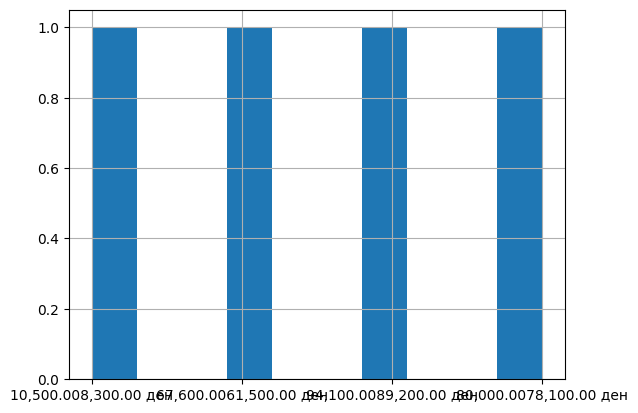

In [ ]:
#add your code
df['price'].hist()
df['price'].plot.bar(figsize=(50, 10))